In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from geoplot import utils
import geoplot as gplt
from geoplot import crs as gcrs
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [4]:
savefig_kwargs = {'bbox_inches': 'tight', 'pad_inches': 0.25}

In [ ]:
!mkdir ../figures/pointplot
!mkdir ../figures/kdeplot
!mkdir ../figures/polyplot
!mkdir ../figures/cartogram
!mkdir ../figures/sankey
!mkdir ../figures/choropleth
!mkdir ../figures/voronoi
!mkdir ../figures/quadtree

# Load example data

# Pointplot

In [ ]:
cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))

In [ ]:
gplt.pointplot(cities)
plt.savefig('../figures/pointplot/pointplot-initial.png', **savefig_kwargs)

In [ ]:
gplt.pointplot(cities, projection=gcrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True)
plt.savefig('../figures/pointplot/pointplot-legend.png', **savefig_kwargs)

In [ ]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(), 
    hue='ELEV_IN_FT',
    legend=True, legend_kwargs={'loc': 'upper left'},
    edgecolor='lightgray', linewidth=0.5
)
plt.savefig('../figures/pointplot/pointplot-kwargs.png', **savefig_kwargs)

In [ ]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(),
    hue='ELEV_IN_FT', k=8, cmap='inferno_r',
    legend=True
)
plt.savefig('../figures/pointplot/pointplot-k.png', **savefig_kwargs)

In [ ]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(), 
    hue='ELEV_IN_FT', scale='ELEV_IN_FT', limits=(5, 10), cmap='inferno_r',
    legend=True, legend_var='scale'
)
plt.savefig('../figures/pointplot/pointplot-scale.png', **savefig_kwargs)

# Polyplot

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

In [ ]:
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
plt.savefig('../figures/polyplot/polyplot-initial.png', **savefig_kwargs)

In [ ]:
ax = gplt.polyplot(
    boroughs, projection=gcrs.AlbersEqualArea(),
    edgecolor='None', facecolor='lightgray'
)
gplt.pointplot(
    collisions[collisions['BOROUGH'].notnull()],
    hue='BOROUGH', ax=ax, legend=True
)
plt.savefig('../figures/polyplot/polyplot-stacked.png', **savefig_kwargs)

# Choropleth

In [ ]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [ ]:
gplt.choropleth(contiguous_usa, hue='population')
plt.savefig('../figures/choropleth/choropleth-initial.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    cmap='Greens', k=5, legend=True
)
plt.savefig('../figures/choropleth/choropleth-cmap.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, legend_kwargs={'loc': 'lower left'}
)
plt.savefig('../figures/choropleth/choropleth-legend-kwargs.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme='fisher_jenks'
)
plt.savefig('../figures/choropleth/choropleth-scheme.png', **savefig_kwargs)

In [ ]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme='fisher_jenks',
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ]
)
plt.savefig('../figures/choropleth/choropleth-labels.png', **savefig_kwargs)

# Cartogram

In [7]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [ ]:
gplt.cartogram(contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea())
plt.savefig('../figures/cartogram/cartogram-initial.png', **savefig_kwargs)

In [ ]:
gplt.cartogram(
    contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'loc': 'lower right'}
)
plt.savefig('../figures/cartogram/cartogram-trace-legend.png', **savefig_kwargs)

In [ ]:
ax = gplt.cartogram(
    contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.9)}, legend_var='hue',
    hue='population', cmap='Greens'
)
gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='white', ax=ax)
plt.savefig('../figures/cartogram/cartogram-cmap.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


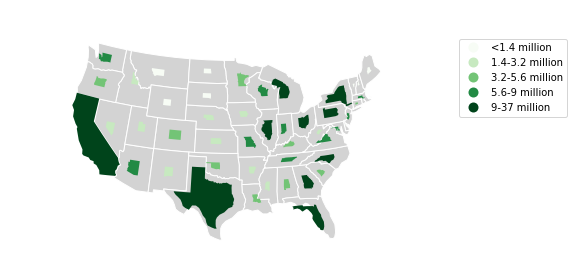

In [8]:
ax = gplt.cartogram(
    contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.9)}, legend_var='hue',
    hue='population', cmap='Greens',
    legend_labels=[
        '<1.4 million', '1.4-3.2 million', '3.2-5.6 million',
        '5.6-9 million', '9-37 million'
    ]
)
gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='white', ax=ax)
plt.savefig('../figures/cartogram/cartogram-legend-labels.png', **savefig_kwargs)

In [ ]:
ax = gplt.cartogram(
    contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.9)}, legend_var='hue',
    hue='population', cmap='Greens',
    legend_labels=[
        '<1.4 million', '1.4-3.2 million', '3.2-5.6 million',
        '5.6-9 million', '9-37 million'
    ],    
    limits=(0.5, 1)
)
gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='white', ax=ax)
plt.savefig('../figures/cartogram/cartogram-limits.png', **savefig_kwargs)

## KDEPlot

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-initial.png', **savefig_kwargs)

In [ ]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), n_levels=20, cmap='Reds')
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/kdeplot/kdeplot-shade.png', **savefig_kwargs)

In [ ]:
ax = gplt.kdeplot(
    collisions, projection=gcrs.AlbersEqualArea(), cmap='Reds',
    shade=True,
    clip=boroughs
)
gplt.polyplot(boroughs, ax=ax, zorder=1)
plt.savefig('../figures/kdeplot/kdeplot-clip.png', **savefig_kwargs)

In [ ]:
ax = gplt.kdeplot(
    collisions, projection=gcrs.AlbersEqualArea(), cmap='Reds',
    shade=True, shade_lowest=True,
    clip=boroughs.geometry
)
gplt.polyplot(boroughs, ax=ax, zorder=1)
plt.savefig('../figures/kdeplot/kdeplot-shade-lowest.png', **savefig_kwargs)

## Sankey

In [ ]:
la_flights = gpd.read_file(gplt.datasets.get_path('la_flights'))
world = gpd.read_file(gplt.datasets.get_path('world'))
dc = gpd.read_file(gplt.datasets.get_path('dc_roads'))

In [ ]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide()
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-geospatial-context.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    hue='Passengers', cmap='Greens', legend=True
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-cmap.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    scale='Passengers', limits=(1, 10),
    hue='Passengers', cmap='Greens', legend=True
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-scale.png', **savefig_kwargs)

In [ ]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    scale='Passengers', limits=(1, 10),
    hue='Passengers', cmap='Greens',
    legend=True, legend_kwargs={'loc': 'lower left'}
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../figures/sankey/sankey-legend-kwargs.png', **savefig_kwargs)

In [ ]:
# gplt.sankey(dc, scale='aadt', color='black', limits=(0.1, 10), projection=gcrs.AlbersEqualArea())
# plt.savefig('../figures/sankey/sankey-dc.png', **savefig_kwargs)

## Voronoi

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
injurious_collisions = gpd.read_file(gplt.datasets.get_path('nyc_injurious_collisions'))

In [ ]:
ax = gplt.voronoi(injurious_collisions.head(1000))
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-simple.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(
    injurious_collisions.head(1000),
    clip=boroughs.simplify(0.001), projection=gcrs.AlbersEqualArea()
)
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-clip.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(
    injurious_collisions.head(1000), projection=gcrs.AlbersEqualArea(),
    clip=boroughs.simplify(0.001),
    hue='NUMBER OF PERSONS INJURED', cmap='Reds',
    legend=True
)
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../figures/voronoi/voronoi-cmap.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(
    injurious_collisions.head(1000), projection=gcrs.AlbersEqualArea(),
    clip=boroughs.simplify(0.001),
    hue='NUMBER OF PERSONS INJURED', cmap='Reds',
    legend=True,
    edgecolor='white', legend_kwargs={'loc': 'upper left'}
)
gplt.polyplot(boroughs, edgecolor='black', zorder=1, ax=ax)
plt.savefig('../figures/voronoi/voronoi-kwargs.png', **savefig_kwargs)

In [ ]:
ax = gplt.voronoi(
    injurious_collisions.head(1000), projection=gcrs.AlbersEqualArea(),
    clip=boroughs.simplify(0.001),
    hue='NUMBER OF PERSONS INJURED', cmap='Reds', k=None,
    legend=True,
    edgecolor='white'
)
gplt.polyplot(boroughs, edgecolor='black', zorder=1, ax=ax)
plt.savefig('../figures/voronoi/voronoi-scheme.png', **savefig_kwargs)

# Quadtree

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

In [ ]:
gplt.quadtree(collisions, nmax=1)
plt.savefig('../figures/quadtree/quadtree-initial.png', **savefig_kwargs)

In [ ]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    facecolor='lightgray', edgecolor='white'
)
plt.savefig('../figures/quadtree/quadtree-clip.png', **savefig_kwargs)

In [ ]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    hue='NUMBER OF PEDESTRIANS INJURED', cmap='Reds',
    edgecolor='white', legend=True
)
plt.savefig('../figures/quadtree/quadtree-hue.png', **savefig_kwargs)

In [ ]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    hue='NUMBER OF PEDESTRIANS INJURED', cmap='Reds', k=None,
    edgecolor='white', legend=True,
)
plt.savefig('../figures/quadtree/quadtree-k.png', **savefig_kwargs)

In [ ]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    hue='NUMBER OF PEDESTRIANS INJURED', cmap='Reds', agg=np.max,
    edgecolor='white', legend=True, k=None
)
plt.savefig('../figures/quadtree/quadtree-agg.png', **savefig_kwargs)

In [ ]:
ax = gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    facecolor='lightgray', edgecolor='white', zorder=0
)
gplt.pointplot(
    collisions,
    s=1, ax=ax
)
plt.savefig('../figures/quadtree/quadtree-basemap.png', **savefig_kwargs)